# DANIELE CECCARELLI - [Matricola 864239]

You have to work on the files:
*  [Books](https://github.com/gdv/foundationsCS/raw/master/progetti/2021/Books.csv.gz)
*  [Book ratings](https://github.com/gdv/foundationsCS/raw/master/progetti/2021/Book-Ratings.csv.gz)
*  [Users](https://github.com/gdv/foundationsCS/raw/master/progetti/2021/Users.csv.gz)
*  [Goodbooks books](https://github.com/gdv/foundationsCS/raw/master/progetti/2021/goodbooks.csv.gz)
*  [Goodbooks ratings](https://github.com/gdv/foundationsCS/raw/master/progetti/2021/goodbooks-ratings.csv.gz)

### Notes

1.    It is mandatory to use GitHub for developing the project.
1.    The project must be a jupyter notebook.
1.    There is no restriction on the libraries that can be used, nor on the Python version.
1.    To read those files, you need to use the `encoding = 'latin-1'` option.
1.    All questions on the project **must** be asked in a public channel on [Zulip](https://focs.zulipchat.com), otherwise no  answer will be given.

## Data Import

In [1]:
import os
import pandas as pd
import numpy as np
import re
from difflib import SequenceMatcher
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 80)

In [3]:
path = '/Users/danielececcarelli/Documents/2 - Foundations_of_Computer_Science'

In [4]:
file_list0 = os.listdir(path)
file_list_csv = []
for i in file_list0:
    if i.endswith('.csv'):
        file_list_csv.append(i)
        

file_list_csv

['Book-Ratings.csv',
 'Users.csv',
 'goodbooks.csv',
 'Books.csv',
 'goodbooks-ratings.csv']

In [5]:
file_list_csv_path = []
for i in file_list_csv:
    w = os.path.join(path, i)
    file_list_csv_path.append(w)
    
file_list_csv_path

['/Users/danielececcarelli/Documents/2 - Foundations_of_Computer_Science/Book-Ratings.csv',
 '/Users/danielececcarelli/Documents/2 - Foundations_of_Computer_Science/Users.csv',
 '/Users/danielececcarelli/Documents/2 - Foundations_of_Computer_Science/goodbooks.csv',
 '/Users/danielececcarelli/Documents/2 - Foundations_of_Computer_Science/Books.csv',
 '/Users/danielececcarelli/Documents/2 - Foundations_of_Computer_Science/goodbooks-ratings.csv']

In [6]:
book_ratings = pd.read_csv(file_list_csv_path[0], 
                            encoding = 'latin-1',
                            delimiter=';'
                   )

book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
users = pd.read_csv(file_list_csv_path[1], 
                    encoding = 'latin-1',
                    delimiter=';'
                   )

users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
goodbooks = pd.read_csv(file_list_csv_path[2], 
                    encoding = 'latin-1',
                    delimiter=','
                   )

goodbooks.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [9]:
books = pd.read_csv(file_list_csv_path[3], 
                    encoding = 'latin-1',
                    delimiter=';'
                   )

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
goodbooks_ratings = pd.read_csv(file_list_csv_path[4], 
                    encoding = 'latin-1',
                    delimiter=','
                   )

goodbooks_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


## Dataframes info (ID columns will be converted to Dtype "object")

In [11]:
file_list_csv

['Book-Ratings.csv',
 'Users.csv',
 'goodbooks.csv',
 'Books.csv',
 'goodbooks-ratings.csv']

### Book ratings

In [12]:
book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [13]:
book_ratings['User-ID'] = book_ratings['User-ID'].apply(str)
book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  object
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 26.3+ MB


### Users

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
users['User-ID'] = users['User-ID'].apply(str)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  object 
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB


### Goodbooks

In [16]:
goodbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    99 non-null     int64  
 1   goodreads_book_id          99 non-null     int64  
 2   best_book_id               99 non-null     int64  
 3   work_id                    99 non-null     int64  
 4   books_count                99 non-null     int64  
 5   isbn                       99 non-null     object 
 6   isbn13                     99 non-null     float64
 7   authors                    99 non-null     object 
 8   original_publication_year  99 non-null     float64
 9   original_title             98 non-null     object 
 10  title                      99 non-null     object 
 11  language_code              98 non-null     object 
 12  average_rating             99 non-null     float64
 13  ratings_count              99 non-null     int64  
 

In [17]:
str_goodbooks_cols = ['book_id', 
                     'goodreads_book_id', 
                     'best_book_id', 
                     'work_id',
                     'isbn',
                     'isbn13']

for i in str_goodbooks_cols:
    goodbooks[i] = goodbooks[i].apply(str)
    
    
goodbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    99 non-null     object 
 1   goodreads_book_id          99 non-null     object 
 2   best_book_id               99 non-null     object 
 3   work_id                    99 non-null     object 
 4   books_count                99 non-null     int64  
 5   isbn                       99 non-null     object 
 6   isbn13                     99 non-null     object 
 7   authors                    99 non-null     object 
 8   original_publication_year  99 non-null     float64
 9   original_title             98 non-null     object 
 10  title                      99 non-null     object 
 11  language_code              98 non-null     object 
 12  average_rating             99 non-null     float64
 13  ratings_count              99 non-null     int64  
 

### Books

In [18]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271359 entries, 0 to 271358
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271359 non-null  object
 1   Book-Title           271359 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271359 non-null  object
 4   Publisher            271357 non-null  object
 5   Image-URL-S          271359 non-null  object
 6   Image-URL-M          271359 non-null  object
 7   Image-URL-L          271356 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


### Goodbooks Ratings

In [19]:
goodbooks_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  99 non-null     int64
 1   book_id  99 non-null     int64
 2   rating   99 non-null     int64
dtypes: int64(3)
memory usage: 2.4 KB


In [20]:
str_goodbooks_rat_cols = ['user_id',
                          'book_id' 
                         ]

for i in str_goodbooks_rat_cols:
    goodbooks_ratings[i] = goodbooks_ratings[i].apply(str)
    
    
goodbooks_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  99 non-null     object
 1   book_id  99 non-null     object
 2   rating   99 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


### 1. Normalize the location field of *Users* dataset, splitting into city, region, country.

In [21]:
len(users)

278858

In [22]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [23]:
users_test = users.Location.str.split(',').apply(pd.Series)
users_test.index = users['User-ID']
#users_test = users_test.reset_index()


In [24]:
users_test.head()

,0,1,2,3,4,5,6,7,8
User-ID,,,,,,,,,
1,nyc,new york,usa,NaN,NaN,NaN,NaN,NaN,NaN
2,stockton,california,usa,NaN,NaN,NaN,NaN,NaN,NaN
3,moscow,yukon territory,russia,NaN,NaN,NaN,NaN,NaN,NaN
4,porto,v.n.gaia,portugal,NaN,NaN,NaN,NaN,NaN,NaN
5,farnborough,hants,united kingdom,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
users_test['count_not_null_values'] = users_test.count(axis=1)
users_test.head()

,0,1,2,3,4,5,6,7,8,count_not_null_values
User-ID,,,,,,,,,,
1,nyc,new york,usa,NaN,NaN,NaN,NaN,NaN,NaN,3
2,stockton,california,usa,NaN,NaN,NaN,NaN,NaN,NaN,3
3,moscow,yukon territory,russia,NaN,NaN,NaN,NaN,NaN,NaN,3
4,porto,v.n.gaia,portugal,NaN,NaN,NaN,NaN,NaN,NaN,3
5,farnborough,hants,united kingdom,NaN,NaN,NaN,NaN,NaN,NaN,3


In [26]:
users_test.groupby(['count_not_null_values']).count()

,0,1,2,3,4,5,6,7,8
count_not_null_values,,,,,,,,,
1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0
3,277348,277348,277348,0,0,0,0,0,0
4,1417,1417,1417,1417,0,0,0,0,0
5,72,72,72,72,72,0,0,0,0
6,11,11,11,11,11,11,0,0,0
7,4,4,4,4,4,4,4,0,0
8,2,2,2,2,2,2,2,2,0
9,2,2,2,2,2,2,2,2,2


In [27]:
users_test1 = users_test.copy()

In [28]:
users_test1 = users_test1.reset_index()
users_test1.index += 1

In [29]:
# fix rows with only one non-null value

In [30]:
users_test1[users_test1['count_not_null_values']==1]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
134377,134377,lawrenceville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [31]:
# lawlerenceville is located in Georgia, U.S.A.
users_test1.loc[(users_test1['User-ID']=='134377'), 1] = 'georgia'
users_test1.loc[(users_test1['User-ID']=='134377'), 2] = 'usa'
users_test1[users_test1['count_not_null_values']==1]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
134377,134377,lawrenceville,georgia,usa,NaN,NaN,NaN,NaN,NaN,NaN,1


In [32]:
# fix rows with only two non-null value

In [33]:
users_test1[users_test1['count_not_null_values']==2]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
29420,29420,st. louis,missouri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [34]:
users_test1.loc[(users_test1['User-ID']=='29420'), 2] = 'usa'
users_test1[users_test1['count_not_null_values']==2]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
29420,29420,st. louis,missouri,usa,NaN,NaN,NaN,NaN,NaN,NaN,2


In [141]:
# we will assume user information with 3 not-null values is correct

In [35]:
# fix rows with 4 non-null values

In [36]:
# please select the number of not null values
number_of_not_null_values_select = 4

last_column = number_of_not_null_values_select - 1
second_last_column = number_of_not_null_values_select - 2
users_test1[users_test1['count_not_null_values']==number_of_not_null_values_select]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
436,436,ivanhoe,melbourne,victoria,australia,NaN,NaN,NaN,NaN,NaN,4
815,815,davis bay,sechelt,british columbia,canada,NaN,NaN,NaN,NaN,NaN,4
841,841,saint charles,mo,missouri,usa,NaN,NaN,NaN,NaN,NaN,4
957,957,santiago,santiago,metropolitana,chile,NaN,NaN,NaN,NaN,NaN,4
1460,1460,mansoura,dakahlia,mansoura,egypt,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...
277718,277718,colorado springs,co 80901,colorado,usa,NaN,NaN,NaN,NaN,NaN,4
277754,277754,north bend,,oregon,usa,NaN,NaN,NaN,NaN,NaN,4
278029,278029,mansfield,nottinghamshire,england,united kingdom,NaN,NaN,NaN,NaN,NaN,4
278215,278215,nelson,motueka,nz,new zealand,NaN,NaN,NaN,NaN,NaN,4


In [37]:
region_country_df = users_test1.loc[(users_test1['count_not_null_values']==number_of_not_null_values_select),['User-ID',second_last_column,last_column]]

for i in region_country_df['User-ID']:
    users_test1.loc[(users_test1['User-ID']==i),2] = region_country_df.loc[(region_country_df['User-ID']==i),last_column].values[0]
    users_test1.loc[(users_test1['User-ID']==i),1] = region_country_df.loc[(region_country_df['User-ID']==i),second_last_column].values[0]
    
    
users_test1[users_test1['count_not_null_values']==number_of_not_null_values_select]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
436,436,ivanhoe,victoria,australia,australia,NaN,NaN,NaN,NaN,NaN,4
815,815,davis bay,british columbia,canada,canada,NaN,NaN,NaN,NaN,NaN,4
841,841,saint charles,missouri,usa,usa,NaN,NaN,NaN,NaN,NaN,4
957,957,santiago,metropolitana,chile,chile,NaN,NaN,NaN,NaN,NaN,4
1460,1460,mansoura,mansoura,egypt,egypt,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...
277718,277718,colorado springs,colorado,usa,usa,NaN,NaN,NaN,NaN,NaN,4
277754,277754,north bend,oregon,usa,usa,NaN,NaN,NaN,NaN,NaN,4
278029,278029,mansfield,england,united kingdom,united kingdom,NaN,NaN,NaN,NaN,NaN,4
278215,278215,nelson,nz,new zealand,new zealand,NaN,NaN,NaN,NaN,NaN,4


In [38]:
# fix rows with 5 non-null values

In [39]:
# please select the number of not null values
number_of_not_null_values_select = 5

last_column = number_of_not_null_values_select - 1
second_last_column = number_of_not_null_values_select - 2
users_test1[users_test1['count_not_null_values']==number_of_not_null_values_select]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
4469,4469,guadalajara,,jalisco,mexico,mexico,NaN,NaN,NaN,NaN,5
5642,5642,mexico,city,mexico,city,mexico,NaN,NaN,NaN,NaN,5
6558,6558,schiltigheim,france,alsace,bas rhin,france,NaN,NaN,NaN,NaN,5
9696,9696,mexico,city,mexico,city,mexico,NaN,NaN,NaN,NaN,5
12513,12513,nanaimo,bc,v9v 1h4,british columbia,canada,NaN,NaN,NaN,NaN,5
17382,17382,karachi,sindh,pakistan,sindh,pakistan,NaN,NaN,NaN,NaN,5
17885,17885,mumbai,mumbai,maharashtra,india,india,NaN,NaN,NaN,NaN,5
21125,21125,addiscombe,croydon,england,,united kingdom,NaN,NaN,NaN,NaN,5
43947,43947,vaubuzin,frolois,cote d`or,burgundy,france,NaN,NaN,NaN,NaN,5
46965,46965,528,seaview parkway,gulf view,n/a,trinidad and tobago,NaN,NaN,NaN,NaN,5


In [40]:
region_country_df = users_test1.loc[(users_test1['count_not_null_values']==number_of_not_null_values_select),['User-ID',second_last_column,last_column]]

for i in region_country_df['User-ID']:
    users_test1.loc[(users_test1['User-ID']==i),2] = region_country_df.loc[(region_country_df['User-ID']==i),last_column].values[0]
    users_test1.loc[(users_test1['User-ID']==i),1] = region_country_df.loc[(region_country_df['User-ID']==i),second_last_column].values[0]
    
    
users_test1[users_test1['count_not_null_values']==number_of_not_null_values_select]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
4469,4469,guadalajara,mexico,mexico,mexico,mexico,NaN,NaN,NaN,NaN,5
5642,5642,mexico,city,mexico,city,mexico,NaN,NaN,NaN,NaN,5
6558,6558,schiltigheim,bas rhin,france,bas rhin,france,NaN,NaN,NaN,NaN,5
9696,9696,mexico,city,mexico,city,mexico,NaN,NaN,NaN,NaN,5
12513,12513,nanaimo,british columbia,canada,british columbia,canada,NaN,NaN,NaN,NaN,5
17382,17382,karachi,sindh,pakistan,sindh,pakistan,NaN,NaN,NaN,NaN,5
17885,17885,mumbai,india,india,india,india,NaN,NaN,NaN,NaN,5
21125,21125,addiscombe,,united kingdom,,united kingdom,NaN,NaN,NaN,NaN,5
43947,43947,vaubuzin,burgundy,france,burgundy,france,NaN,NaN,NaN,NaN,5
46965,46965,528,n/a,trinidad and tobago,n/a,trinidad and tobago,NaN,NaN,NaN,NaN,5


In [41]:
# fix rows with 6 non-null values

In [42]:
# please select the number of not null values
number_of_not_null_values_select = 6
last_column = number_of_not_null_values_select - 1
users_test1[users_test1['count_not_null_values']==number_of_not_null_values_select]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
76343,76343,chula vista,tijuana,california,baja california,usa,mexico,NaN,NaN,NaN,6
85973,85973,isulan,sultan,kudarat,isulan,sultan kudarat,philippines,NaN,NaN,NaN,6
104038,104038,1,tebuk tukang emas,bagan datoh,perak,n/a,malaysia,NaN,NaN,NaN,6
108497,108497,90 lawerances,ave apt 2,dorchester,ma 02121,massachusetts,usa,NaN,NaN,NaN,6
122335,122335,tianjin,room 308,61 men,guishan li,xueyuan rd. hexi dist,china,NaN,NaN,NaN,6
122815,122815,philippine science high school - cmc,mcc main stadium,sagadan,tubod,lanao del norte,philippines,NaN,NaN,NaN,6
227902,227902,makati city,philippines,pangasinan,,region 3,philippines,NaN,NaN,NaN,6
243264,243264,hno:25-21/6,eastanandbagh,malkajgiri,hyderabad,ap,india,NaN,NaN,NaN,6
258823,258823,lurgan,county armagh,n. ireland,bt66 6bx,northern ireland,united kingdom,NaN,NaN,NaN,6
262289,262289,hno:25-21/6,eastanadbagh,malakajgiri,hyderabad,ap,india,NaN,NaN,NaN,6


In [43]:
users_test1.loc[(users_test1['User-ID']=='76343'), 0]  = 'tijuana'
users_test1.loc[(users_test1['User-ID']=='76343'), 1]  = 'baja california'

users_test1.loc[(users_test1['User-ID']=='85973'), 0]  = 'isulan'
users_test1.loc[(users_test1['User-ID']=='85973'), 1]  = 'sultan'

users_test1.loc[(users_test1['User-ID']=='104038'), 0] = 'bagan datoh'
users_test1.loc[(users_test1['User-ID']=='104038'), 1] = 'perak'

users_test1.loc[(users_test1['User-ID']=='108497'), 0] = 'dorchester'
users_test1.loc[(users_test1['User-ID']=='108497'), 1] = 'massachusetts'

users_test1.loc[(users_test1['User-ID']=='122335'), 0] = 'tianjin'
users_test1.loc[(users_test1['User-ID']=='122335'), 1] = 'xueyuan rd. hexi dist'

users_test1.loc[(users_test1['User-ID']=='122815'), 0] = 'sagadan'
users_test1.loc[(users_test1['User-ID']=='122815'), 1] = 'lanao del norte'

users_test1.loc[(users_test1['User-ID']=='227902'), 0] = 'makati city'
users_test1.loc[(users_test1['User-ID']=='227902'), 1] = 'pangasinan'

users_test1.loc[(users_test1['User-ID']=='243264'), 0] = 'eastanandbagh'
users_test1.loc[(users_test1['User-ID']=='243264'), 1] = 'malkajgiri'

users_test1.loc[(users_test1['User-ID']=='258823'), 0] = 'lurgan'
users_test1.loc[(users_test1['User-ID']=='258823'), 1] = 'northern ireland'

users_test1.loc[(users_test1['User-ID']=='262289'), 0] = 'eastanadbagh'
users_test1.loc[(users_test1['User-ID']=='262289'), 1] = 'malakajgiri'

users_test1.loc[(users_test1['User-ID']=='274066'), 0] = 'marulas'
users_test1.loc[(users_test1['User-ID']=='274066'), 1] = 'kawit'

users_test1[users_test1['count_not_null_values']==number_of_not_null_values_select]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
76343,76343,tijuana,baja california,california,baja california,usa,mexico,NaN,NaN,NaN,6
85973,85973,isulan,sultan,kudarat,isulan,sultan kudarat,philippines,NaN,NaN,NaN,6
104038,104038,bagan datoh,perak,bagan datoh,perak,n/a,malaysia,NaN,NaN,NaN,6
108497,108497,dorchester,massachusetts,dorchester,ma 02121,massachusetts,usa,NaN,NaN,NaN,6
122335,122335,tianjin,xueyuan rd. hexi dist,61 men,guishan li,xueyuan rd. hexi dist,china,NaN,NaN,NaN,6
122815,122815,sagadan,lanao del norte,sagadan,tubod,lanao del norte,philippines,NaN,NaN,NaN,6
227902,227902,makati city,pangasinan,pangasinan,,region 3,philippines,NaN,NaN,NaN,6
243264,243264,eastanandbagh,malkajgiri,malkajgiri,hyderabad,ap,india,NaN,NaN,NaN,6
258823,258823,lurgan,northern ireland,n. ireland,bt66 6bx,northern ireland,united kingdom,NaN,NaN,NaN,6
262289,262289,eastanadbagh,malakajgiri,malakajgiri,hyderabad,ap,india,NaN,NaN,NaN,6


In [44]:
country_df = users_test1.loc[(users_test1['count_not_null_values']==number_of_not_null_values_select),['User-ID',last_column]]

for i in country_df['User-ID']:
    users_test1.loc[(users_test1['User-ID']==i),2] = country_df.loc[(country_df['User-ID']==i),last_column].values[0]
    
    
users_test1[users_test1['count_not_null_values']==number_of_not_null_values_select]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
76343,76343,tijuana,baja california,mexico,baja california,usa,mexico,NaN,NaN,NaN,6
85973,85973,isulan,sultan,philippines,isulan,sultan kudarat,philippines,NaN,NaN,NaN,6
104038,104038,bagan datoh,perak,malaysia,perak,n/a,malaysia,NaN,NaN,NaN,6
108497,108497,dorchester,massachusetts,usa,ma 02121,massachusetts,usa,NaN,NaN,NaN,6
122335,122335,tianjin,xueyuan rd. hexi dist,china,guishan li,xueyuan rd. hexi dist,china,NaN,NaN,NaN,6
122815,122815,sagadan,lanao del norte,philippines,tubod,lanao del norte,philippines,NaN,NaN,NaN,6
227902,227902,makati city,pangasinan,philippines,,region 3,philippines,NaN,NaN,NaN,6
243264,243264,eastanandbagh,malkajgiri,india,hyderabad,ap,india,NaN,NaN,NaN,6
258823,258823,lurgan,northern ireland,united kingdom,bt66 6bx,northern ireland,united kingdom,NaN,NaN,NaN,6
262289,262289,eastanadbagh,malakajgiri,india,hyderabad,ap,india,NaN,NaN,NaN,6


In [45]:
# fix rows with 7 non-null values

In [46]:
users_test1[users_test1['count_not_null_values']==7]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
108114,108114,istanbul,eskisehir,antalya/olympos,istanbul,eskisehir,antalya/olympos,turkey,NaN,NaN,7
189618,189618,ogba,lagos,nigeria,,ogba,lagosstate,nigeria,NaN,NaN,7
194260,194260,dae-jeon,dae-jeon,yu-song,guam-dong,626-1,302,south korea,NaN,NaN,7
215971,215971,silver spring,md,metropolitan washington,dc area (dc,md,and va),usa,NaN,NaN,7


In [47]:
users_test1.loc[(users_test1['User-ID']=='108114'), 1] = 'eskisehir'
users_test1.loc[(users_test1['User-ID']=='108114'), 2] = 'turkey'

users_test1.loc[(users_test1['User-ID']=='189618'), 1] = 'ogba'
users_test1.loc[(users_test1['User-ID']=='189618'), 2] = 'nigeria'


users_test1.loc[(users_test1['User-ID']=='194260'), 1] = 'dae-jeon'
users_test1.loc[(users_test1['User-ID']=='194260'), 2] = 'south korea'

users_test1.loc[(users_test1['User-ID']=='215971'), 1] = 'marlyand'
users_test1.loc[(users_test1['User-ID']=='215971'), 2] = 'usa'


users_test1[users_test1['count_not_null_values']==7]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
108114,108114,istanbul,eskisehir,turkey,istanbul,eskisehir,antalya/olympos,turkey,NaN,NaN,7
189618,189618,ogba,ogba,nigeria,,ogba,lagosstate,nigeria,NaN,NaN,7
194260,194260,dae-jeon,dae-jeon,south korea,guam-dong,626-1,302,south korea,NaN,NaN,7
215971,215971,silver spring,marlyand,usa,dc area (dc,md,and va),usa,NaN,NaN,7


In [48]:
# fix rows with 8 non-null values

In [49]:
users_test1[users_test1['count_not_null_values']==8]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
60009,60009,new delhi,7/2,block-o,r.k.puram,sector-13,new delhi,india,india,NaN,8
273098,273098,vashon,washington,wa,id,or,ak,bc,usa,NaN,8


In [50]:
users_test1.loc[(users_test1['User-ID']=='60009'), 1] = 'new delhi'
users_test1.loc[(users_test1['User-ID']=='60009'), 2] = 'india'

users_test1.loc[(users_test1['User-ID']=='273098'), 2] = 'usa'
users_test1[users_test1['count_not_null_values']==8]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
60009,60009,new delhi,new delhi,india,r.k.puram,sector-13,new delhi,india,india,NaN,8
273098,273098,vashon,washington,usa,id,or,ak,bc,usa,NaN,8


In [51]:
# fix rows with 9 non-null values

In [52]:
users_test1[users_test1['count_not_null_values']==9]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
235182,235182,bangalore,#341,4main,6cross,2phase,r`nagar,m`nagar,b`lore-10,india,9
241303,241303,nmrl,addl-ambernath,thane,mumbai,pin 421 506,ambernath,thane,maharastra,india,9


In [53]:
users_test1.loc[(users_test1['User-ID']=='235182'), 1] = 'karnataka'
users_test1.loc[(users_test1['User-ID']=='235182'), 2] = 'india'

users_test1.loc[(users_test1['User-ID']=='241303'), 0] = 'ambernath'
users_test1.loc[(users_test1['User-ID']=='241303'), 1] = 'maharastra'
users_test1.loc[(users_test1['User-ID']=='241303'), 2] = 'india'
users_test1[users_test1['count_not_null_values']==9]

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
235182,235182,bangalore,karnataka,india,6cross,2phase,r`nagar,m`nagar,b`lore-10,india,9
241303,241303,ambernath,maharastra,india,mumbai,pin 421 506,ambernath,thane,maharastra,india,9


In [54]:
initial_country_list = list(users_test1[2].unique())

In [55]:
len(initial_country_list)

712

In [56]:
initial_country_list

[' usa',
 ' russia',
 ' portugal',
 ' united kingdom',
 ' canada',
 ' spain',
 ' australia',
 ' brazil',
 '',
 ' germany',
 ' mexico',
 ' china',
 ' italy',
 ' distrito federal',
 ' france',
 ' netherlands',
 ' iraq',
 ' finland',
 ' new zealand',
 ' india',
 ' ghana',
 ' switzerland',
 ' slovenia',
 ' iran',
 ' peru',
 ' bosnia and herzegovina',
 ' vietnam',
 ' sri lanka',
 ' pakistan',
 ' denmark',
 ' belgium',
 ' malaysia',
 ' u.a.e',
 ' turkey',
 ' philippines',
 ' greece',
 ' colombia',
 ' norway',
 ' kuwait',
 ' chile',
 ' quit',
 ' lj',
 ' taiwan',
 ' denmark"',
 ' espaÃ±a',
 ' sweden',
 ' argentina',
 ' nigeria',
 ' london',
 ' bulgaria',
 ' austria',
 ' romania',
 ' singapore',
 ' albania',
 ' egypt',
 ' tunisia',
 ' uzbekistan',
 ' qatar',
 ' syria',
 ' saudi arabia',
 ' indonesia',
 ' sudan',
 ' somewherein space',
 ' poland',
 ' thailand',
 ' ireland',
 ' malaysia"',
 ' venezuela',
 ' paraguay',
 ' mozambique',
 ' morocco',
 ' afghanistan',
 ' estonia',
 ' clackamas',
 ' sp

In [57]:
users_test1[2] = users_test1[2].apply(lambda x:x.strip())
users_test1[2]

1                    usa
2                    usa
3                 russia
4               portugal
5         united kingdom
               ...      
278854               usa
278855    united kingdom
278856            canada
278857               usa
278858           ireland
Name: 2, Length: 278858, dtype: object

In [58]:
initial_country_list1 = list(users_test1[2].unique())
initial_country_list1[0:5]

['usa', 'russia', 'portugal', 'united kingdom', 'canada']

In [59]:
users_test1.head()

,User-ID,0,1,2,3,4,5,6,7,8,count_not_null_values
1,1,nyc,new york,usa,NaN,NaN,NaN,NaN,NaN,NaN,3
2,2,stockton,california,usa,NaN,NaN,NaN,NaN,NaN,NaN,3
3,3,moscow,yukon territory,russia,NaN,NaN,NaN,NaN,NaN,NaN,3
4,4,porto,v.n.gaia,portugal,NaN,NaN,NaN,NaN,NaN,NaN,3
5,5,farnborough,hants,united kingdom,NaN,NaN,NaN,NaN,NaN,NaN,3


In [60]:
users_test2 = users_test1.iloc[:,[0,1,2,3]]
users_test2 = users_test2.rename(columns={0 : 'city', 
                                  1 : 'region', 
                                  2 : 'country'})

users_test2.head(1)

,User-ID,city,region,country
1,1,nyc,new york,usa


In [61]:
users = users.merge(users_test2.iloc[:,[0,1,2,3]],
                     on='User-ID',
                     how='inner')

users.head()


,User-ID,Location,Age,city,region,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


In [62]:
def check_similar (list_input, field):
    print('Field \"'+ field + '\" has possible duplicates, please check: ')
    i,j=0,0
    simili=[]
    for i in range(len (list_input)):
        for j in range(len(list_input)):
            match = SequenceMatcher(a=list_input[i], b=list_input[j]).ratio()
            if (match >0.95) and (match <1 ) :
                print(list_input[i] + '   /   ' + list_input[j])
                simili.append(list_input[j])
    if len(simili)==0:
        print('No duplicates')

In [64]:
unique_countries_times = list(users['country'].unique())
unique_countries_times.sort()
check_similar (unique_countries_times, 'country')

Field "country" has possible duplicates, please check: 
bangladesh   /   bangladesh"
bangladesh"   /   bangladesh
cape verde   /   cape verde"
cape verde"   /   cape verde
china Ã¶Ã°Â¹Ãº   /   chinaÃ¶Ã°Â¹Ãº
chinaÃ¶Ã°Â¹Ãº   /   china Ã¶Ã°Â¹Ãº
costa rica   /   costa rica"
costa rica"   /   costa rica
cote d`ivoire   /   cote d`ivoire"
cote d`ivoire"   /   cote d`ivoire
czech republic   /   czech republic"
czech republic"   /   czech republic
deutschland   /   deutschland"
deutschland"   /   deutschland
la chine Ã©ternelle !   /   la chine Ã©ternelle!
la chine Ã©ternelle!   /   la chine Ã©ternelle !
luxembourg   /   luxembourg"
luxembourg"   /   luxembourg
mozambique   /   mozambique"
mozambique"   /   mozambique
netherlands   /   netherlands"
netherlands"   /   netherlands
new zealand   /   new zealand"
new zealand   /   newzealand
new zealand"   /   new zealand
newzealand   /   new zealand
philippine   /   philippines
philippines   /   philippine
philippines   /   philippines"
philippin

In [65]:
users['country'] = users['country'].replace('"','', regex=True)
users['country'] = users['country'].replace('!','', regex=True)
users['country'] = users['country'].replace('china Ã¶Ã°Â¹Ãº','china', regex=True)
users['country'] = users['country'].replace('chinaÃ¶Ã°Â¹Ãº','china', regex=True)
users['country'] = users['country'].replace('newzealand','new zealand', regex=True)
users['country'] = users['country'].replace('saudia arabia','saudi arabia', regex=True)
users['country'] = users['country'].replace('rep san marino','rep. san marino', regex=True)


philippines_list = ['philippine', 'philippiness','philippinies']
for i in philippines_list:
    users['country'] = users['country'].replace(i,'philippines', regex=True)



china_list = ['china Ã¶Ã°Â¹Ãº','chinaÃ¶Ã°Â¹Ãº','la chine Ã©ternelle','la chine Ã©ternelle ']
for i in china_list:
    users['country'] = users['country'].replace(i,'china', regex=True)
    
    
united_kingdom_list = ['united kindgdom', 'united kingdom.']
for i in united_kingdom_list:
    users['country'] = users['country'].replace(i,'united kingdom', regex=True)
    
    
usa_list = ['united sates', 
            'united state',
            'united statea',
            'united stated',
            'united stated of america',
            'united states of america']
for i in usa_list:
    users['country'] = users['country'].replace(i,'usa', regex=True)
    
users.head()

,User-ID,Location,Age,city,region,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


In [66]:
unique_countries_times = list(users['country'].unique())
unique_countries_times.sort()
check_similar (unique_countries_times, 'country')

Field "country" has possible duplicates, please check: 
No duplicates


In [140]:
len(list(users.country.unique()))

616

In [67]:
# we still have data that needs to be cleaned
users[users['country']=='los estados unidos de norte america']

,User-ID,Location,Age,city,region,country
225896,225897,"rockville, maryland, los estados unidos de nor...",NaN,rockville,maryland,los estados unidos de norte america


### 2. For each book in the *Books* dataset, compute its average rating.

In [68]:
book_ratings.head(1) 

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


In [69]:
mean_rating = book_ratings.groupby('ISBN')['Book-Rating'].mean()
mean_rating = mean_rating.reset_index()
mean_rating = mean_rating.rename(columns = {'Book-Rating':'Mean-Book-Rating'})
mean_rating.head()

,ISBN,Mean-Book-Rating
0,0330299891,3.0
1,0375404120,1.5
2,0586045007,0.0
3,9022906116,3.5
4,9032803328,0.0


In [70]:
books = pd.merge(books, 
                    mean_rating, 
                    how='left', 
                    on='ISBN')

books[['ISBN', 'Book-Title', 'Mean-Book-Rating']].head()

,ISBN,Book-Title,Mean-Book-Rating
0,0195153448,Classical Mythology,0.000000
1,0002005018,Clara Callan,4.928571
2,0060973129,Decision in Normandy,5.000000
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,4.272727
4,0393045218,The Mummies of Urumchi,0.000000


### 3. For each book in the *GoodBooks* dataset, compute its average rating.

In [71]:
col_list0 = ['isbn',
            'average_rating',
            'ratings_count',
            'work_ratings_count',
            'work_text_reviews_count',
            'ratings_1',
            'ratings_2',
            'ratings_3',
            'ratings_4',
            'ratings_5']

goodbooks[col_list0].head(1)

,isbn,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,439023483,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317


In [72]:
goodbooks00 = goodbooks.copy()

In [73]:
ratings_cols = ['ratings_1',
                'ratings_2',
                'ratings_3',
                'ratings_4',
                'ratings_5']


goodbooks00['total_number_of_rating'] = goodbooks00[ratings_cols].sum(axis=1)

weight_cols = ['weight_1',
               'weight_2',
               'weight_3',
               'weight_4',
               'weight_5']


for i, j in zip(weight_cols, ratings_cols):
    goodbooks00[i] = goodbooks00[j]/goodbooks00['total_number_of_rating']


goodbooks00[['isbn', 
             'total_number_of_rating', 
             'ratings_1',
                'ratings_2',
                'ratings_3',
                'ratings_4',
                'ratings_5',
             'weight_1',
               'weight_2',
               'weight_3',
               'weight_4',
               'weight_5']].head()

,isbn,total_number_of_rating,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,weight_1,weight_2,weight_3,weight_4,weight_5
0,439023483,4942365,66715,127936,560092,1481305,2706317,0.013499,0.025886,0.113325,0.299716,0.547575
1,439554934,4800065,75504,101676,455024,1156318,3011543,0.015730,0.021182,0.094795,0.240896,0.627396
2,316015849,3916824,456191,436802,793319,875073,1355439,0.116470,0.111519,0.202541,0.223414,0.346056
3,61120081,3340896,60427,117415,446835,1001952,1714267,0.018087,0.035145,0.133747,0.299905,0.513116
4,743273567,2773745,86236,197621,606158,936012,947718,0.031090,0.071247,0.218534,0.337454,0.341675


In [74]:
value_weight_cols = ['value_weight_1',
                       'value_weight_2',
                       'value_weight_3',
                       'value_weight_4',
                       'value_weight_5']


values_cols = list(np.arange(1,6))


for i, j, w in zip(value_weight_cols, weight_cols, values_cols):
    goodbooks00[i] = goodbooks00[j] * w

    
goodbooks00['weighted_avg_rating'] = goodbooks00[value_weight_cols].sum(axis=1)
goodbooks00['weighted_avg_rating'] = goodbooks00['weighted_avg_rating'].apply(lambda x:round(x,2))
goodbooks00.iloc[0,:]

book_id                                                                      1
goodreads_book_id                                                      2767052
best_book_id                                                           2767052
work_id                                                                2792775
books_count                                                                272
isbn                                                                 439023483
isbn13                                                         9780439023480.0
authors                                                        Suzanne Collins
original_publication_year                                               2008.0
original_title                                                The Hunger Games
title                                  The Hunger Games (The Hunger Games, #1)
language_code                                                              eng
average_rating                                      

In [75]:
goodbooks00[['isbn',
             'original_title',
             'authors',
             'average_rating',
             'weighted_avg_rating'
              ]].head(20)

,isbn,original_title,authors,average_rating,weighted_avg_rating
0,439023483,The Hunger Games,Suzanne Collins,4.34,4.34
1,439554934,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPrÃ©",4.44,4.44
2,316015849,Twilight,Stephenie Meyer,3.57,3.57
3,61120081,To Kill a Mockingbird,Harper Lee,4.25,4.25
4,743273567,The Great Gatsby,F. Scott Fitzgerald,3.89,3.89
5,525478817,The Fault in Our Stars,John Green,4.26,4.26
6,618260307,The Hobbit or There and Back Again,J.R.R. Tolkien,4.25,4.25
7,316769177,The Catcher in the Rye,J.D. Salinger,3.79,3.79
8,1416524797,Angels & Demons,Dan Brown,3.85,3.85
9,679783261,Pride and Prejudice,Jane Austen,4.24,4.24


### 4. Merge together all rows sharing the same book title, author and publisher. We will call the resulting datset `merged books`. The books that have not been merged together will not appear in `merged books`.

In [76]:
books00 = books[['ISBN',
                   'Book-Title',
                   'Book-Author',
                   'Year-Of-Publication',
                   'Publisher',
                   'Mean-Book-Rating']].copy()



In [77]:
# we will only keep the rows of the "books" dataframe with a count value greater than 1

count_merged_books = books00.groupby(['Book-Title',
                                       'Book-Author',
                                       'Publisher'])['ISBN'].count()
count_merged_books = pd.DataFrame(count_merged_books)
count_merged_books = count_merged_books.rename(columns={'ISBN':'Count'})
count_merged_books = count_merged_books[count_merged_books['Count']>1]
count_merged_books = count_merged_books.reset_index()
count_merged_books.head()


,Book-Title,Book-Author,Publisher,Count
0,!%@ (A Nutshell handbook),Donnalyn Frey,O'Reilly,2
1,'A Hell of a Place to Lose a Cow': An American...,Tim Brookes,National Geographic,2
2,"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,Barnes &amp; Nobles Books,2
3,101 Famous Poems,Roy J. Cook,McGraw-Hill/Contemporary Books,3
4,15 Houseplants Even You Can't Kill,Joe Elder,Berkley Pub Group,2


In [78]:
merged_books = count_merged_books[['Book-Title',
                                   'Book-Author',
                                   'Publisher']]

merged_books.head()

,Book-Title,Book-Author,Publisher
0,!%@ (A Nutshell handbook),Donnalyn Frey,O'Reilly
1,'A Hell of a Place to Lose a Cow': An American...,Tim Brookes,National Geographic
2,"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,Barnes &amp; Nobles Books
3,101 Famous Poems,Roy J. Cook,McGraw-Hill/Contemporary Books
4,15 Houseplants Even You Can't Kill,Joe Elder,Berkley Pub Group


In [79]:
len(merged_books)

4725

### 5. For each book in `merged books` compute its average rating.

The average is computed considering all books in `books` that have been merged.

In [80]:
merged_books1 = merged_books.copy()





merged_books5 = pd.merge(books00,
                        merged_books1,
                        how = 'inner',
                        on = ['Book-Title',
                              'Book-Author',
                              'Publisher'])

merged_books5 = merged_books5.sort_values(by=['Book-Title',
                                            'Book-Author',
                                            'Publisher',
                                             'ISBN'])


merged_books5[['Book-Title',
               'Book-Author',
               'Publisher',
               'ISBN',
               'Mean-Book-Rating']].head()
                        

,Book-Title,Book-Author,Publisher,ISBN,Mean-Book-Rating
6244,!%@ (A Nutshell handbook),Donnalyn Frey,O'Reilly,1565920317,6.00
6243,!%@ (A Nutshell handbook),Donnalyn Frey,O'Reilly,1565920465,0.00
8472,'A Hell of a Place to Lose a Cow': An American...,Tim Brookes,National Geographic,0792276833,0.00
8473,'A Hell of a Place to Lose a Cow': An American...,Tim Brookes,National Geographic,0792277295,3.40
7272,"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,Barnes &amp; Nobles Books,1566196256,7.25


In [81]:
merged_books5_grouped = merged_books5.groupby(['Book-Title',
                                                'Book-Author',
                                                'Publisher'])['Mean-Book-Rating'].mean()

merged_books5_grouped = pd.DataFrame(merged_books5_grouped)
merged_books5_grouped = merged_books5_grouped.rename(columns={'Mean-Book-Rating':'Grouped_Mean'})
merged_books5_grouped.head()

,,,Grouped_Mean
Book-Title,Book-Author,Publisher,
!%@ (A Nutshell handbook),Donnalyn Frey,O'Reilly,3.000000
'A Hell of a Place to Lose a Cow': An American Hitchhiking Odyssey,Tim Brookes,National Geographic,1.700000
"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,Barnes &amp; Nobles Books,6.958333
101 Famous Poems,Roy J. Cook,McGraw-Hill/Contemporary Books,3.111111
15 Houseplants Even You Can't Kill,Joe Elder,Berkley Pub Group,0.000000


### 6. For each book in `merged books` compute the minimum and maximum of the average ratings over all corresponding books in the `books` dataset.

Hence for each book in `merged books` we will have exactly two values (a minimum and a maximum)

In [82]:
merged_books6_min = merged_books5.groupby(['Book-Title',
                                        'Book-Author',
                                        'Publisher'])['Mean-Book-Rating'].min()

merged_books6_min = pd.DataFrame(merged_books6_min)
merged_books6_min = merged_books6_min.rename(columns={'Mean-Book-Rating':'Min_Rating'})


merged_books6_max = merged_books5.groupby(['Book-Title',
                                        'Book-Author',
                                        'Publisher'])['Mean-Book-Rating'].max()

merged_books6_max = pd.DataFrame(merged_books6_max)
merged_books6_max = merged_books6_max.rename(columns={'Mean-Book-Rating':'Max_Rating'})


merged_books6 = pd.merge(merged_books6_min,
                         merged_books6_max,
                         how='inner',
                         left_index=True,
                         right_index=True)

merged_books6.head(10)

,,,Min_Rating,Max_Rating
Book-Title,Book-Author,Publisher,,
!%@ (A Nutshell handbook),Donnalyn Frey,O'Reilly,0.000000,6.000000
'A Hell of a Place to Lose a Cow': An American Hitchhiking Odyssey,Tim Brookes,National Geographic,0.000000,3.400000
"10,000 dreams interpreted: A dictionary of dreams",Gustavus Hindman Miller,Barnes &amp; Nobles Books,6.666667,7.250000
101 Famous Poems,Roy J. Cook,McGraw-Hill/Contemporary Books,0.000000,5.000000
15 Houseplants Even You Can't Kill,Joe Elder,Berkley Pub Group,0.000000,0.000000
158 POUND MARRIAGE,John Irving,Pocket,1.333333,3.500000
1700: Scenes from London Life,Maureen Waller,Four Walls Eight Windows,4.500000,8.000000
1921 : The Great Novel of the Irish Civil War (Irish Century),Morgan Llywelyn,Forge Books,0.000000,2.000000
2001. Odyssee im Weltraum.,Arthur C. Clarke,Heyne,0.000000,9.000000


### 7. For each book in `goodbooks`, compute the list of its authors. Assuming that the number of reviews with a text (column `work_text_reviews_count`) is split equally among all authors, find for each authors the total number of reviews with a text. We will call this quantity the *shared number of reviews with a text*.

In [83]:
goodbooks.head(2)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9780439023480.0,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9780439554930.0,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...


In [84]:
goodbooks11 = goodbooks.copy()

authors0 = goodbooks11.authors.str.split(',').apply(pd.Series)
authors0.index = goodbooks11.isbn
authors0.head()

,0,1,2,3,4
isbn,,,,,
439023483,Suzanne Collins,NaN,NaN,NaN,NaN
439554934,J.K. Rowling,Mary GrandPrÃ©,NaN,NaN,NaN
316015849,Stephenie Meyer,NaN,NaN,NaN,NaN
61120081,Harper Lee,NaN,NaN,NaN,NaN
743273567,F. Scott Fitzgerald,NaN,NaN,NaN,NaN


In [85]:
authors00 = authors0.copy()
authors00 = authors00.reset_index()

col_value_vars =list(authors00.columns)[1:]
col_id_vars =list(authors00.columns)[0]
authors2 = pd.melt(authors00,
                    id_vars = col_id_vars,
                    value_vars = col_value_vars
                    #,var_name='year', 
                   ,value_name='Author'
                  )

authors2 = authors2.sort_values(by=['isbn'])
authors2 = authors2.dropna(subset=['Author'])
authors2 = authors2[['isbn','Author']]

authors2.head()

,isbn,Author
74,014028009X,Helen Fielding
89,014038572X,S.E. Hinton
87,014241493X,John Green
83,030734813X,Michael Crichton
55,031606792X,Stephenie Meyer


In [86]:
authors2_count = authors2.groupby(['isbn'])['Author'].count()
authors2_count = pd.DataFrame(authors2_count)
authors2_count = authors2_count.rename(columns={'Author':'number_of_authors'})
authors2_count = authors2_count.reset_index()
authors2_count = pd.merge(authors2_count,
                            goodbooks[['isbn','work_text_reviews_count']],
                          how='inner',
                          on='isbn')

authors2_count['number_of_reviews_per_book_author'] = authors2_count['work_text_reviews_count']/authors2_count['number_of_authors']
authors2_count.head()


,isbn,number_of_authors,work_text_reviews_count,number_of_reviews_per_book_author
0,014028009X,1,8157,8157.0
1,014038572X,1,22662,22662.0
2,014241493X,1,42717,42717.0
3,030734813X,1,8143,8143.0
4,031606792X,1,44550,44550.0


In [87]:
authors2 = pd.merge(authors2,
                    authors2_count,
                    how='inner',
                    on='isbn')

authors2 = authors2.sort_values(by=['Author'])
authors2 = authors2.rename(columns={'number_of_reviews_per_book_author':'shared number of reviews with a text'})



authors2[['isbn',	
          'Author',
          'shared number of reviews with a text']].head()

,isbn,Author,shared number of reviews with a text
119,61122416,Alan R. Clarke,27890.500000
108,553296981,B.M. Mooyaart-Doubleday,6941.666667
34,143039954,Bernard Knox,1620.200000
97,451524934,CelÃ¢l Ãster,15172.666667
76,393970124,David J. Skal,5754.333333


In [88]:
len(authors2)

141

In [89]:
# let's calculate the total number of reviews for each author

authors3 = authors2.copy()
authors3 = authors3.groupby(['Author'])['shared number of reviews with a text'].sum()
authors3 = pd.DataFrame(authors3)
authors3 = authors3.reset_index()

In [90]:
authors3.tail()

,Author,shared number of reviews with a text
105,Veronica Roth,156896.0
106,William Golding,26886.0
107,William Goldman,15630.0
108,William Shakespeare,7389.0
109,Yann Martel,42962.0


In [91]:
len(authors3)

110

### 8. For each year of publication, determine the author that has the largest value of the shared number of reviews with a text.

In [92]:
# we will use "authors2" dataframe instead of the "authors3" dataframe

goodbooks800 = goodbooks.copy()
goodbooks80 = pd.merge(goodbooks800,
                      authors2[['isbn',
                                'Author',
                                'shared number of reviews with a text'
                                ]],
                      how='inner',
                      on='isbn')


goodbooks80 = goodbooks80.sort_values(by=['original_publication_year'])

goodbooks80 = goodbooks80[['isbn',
                        'original_publication_year',
                        'Author',
                        'shared number of reviews with a text']]

goodbooks80.head(20)

,isbn,original_publication_year,Author,shared number of reviews with a text
104,143039954,-720.0,Bernard Knox,1620.200000
106,143039954,-720.0,FrÃ©dÃ©ric Mugler,1620.200000
107,143039954,-720.0,Robert Fagles,1620.200000
108,143039954,-720.0,Homer,1620.200000
105,143039954,-720.0,E.V. Rieu,1620.200000
41,743477111,1595.0,Robert Jackson,7389.000000
42,743477111,1595.0,William Shakespeare,7389.000000
99,141439661,1811.0,Tony Tanner,3842.000000
98,141439661,1811.0,Ros Ballaster,3842.000000
100,141439661,1811.0,Jane Austen,3842.000000


In [93]:
# number of unique publication years
goodbooks80['original_publication_year'].nunique()

58

In [94]:
unique_years0 = goodbooks80.groupby(['original_publication_year']).count()
unique_years0

,isbn,Author,shared number of reviews with a text
original_publication_year,,,
-720.0,5,5,5
1595.0,2,2,2
1811.0,3,3,3
1813.0,1,1,1
1818.0,3,3,3
1847.0,4,4,4
1859.0,3,3,3
1868.0,1,1,1
1884.0,3,3,3


In [95]:
print('number of count values greater than one: ',len(unique_years0[unique_years0['Author']>1]))
print('number of count values equal to one: ',len(unique_years0[unique_years0['Author']==1]))
print('number of rows: ',len(unique_years0))

number of count values greater than one:  33
number of count values equal to one:  25
number of rows:  58


In [96]:
unique_years_and_author = goodbooks80.groupby(['original_publication_year','Author']).count()
unique_years_and_author[unique_years_and_author['isbn']>1]

,,isbn,shared number of reviews with a text
original_publication_year,Author,,
2008.0,Stephenie Meyer,2,2
2011.0,E.L. James,2,2


In [97]:
yearly_data = goodbooks80.groupby(['original_publication_year','Author'])['shared number of reviews with a text'].sum()
yearly_data = yearly_data.reset_index()
yearly_data = yearly_data.sort_values(by=['original_publication_year'])
yearly_data.tail()

,original_publication_year,Author,shared number of reviews with a text
136,2012.0,John Green,140739.0
137,2012.0,Veronica Roth,55873.0
134,2012.0,E.L. James,25287.0
135,2012.0,Gillian Flynn,121614.0
138,2015.0,Paula Hawkins,93600.0


In [98]:
times_max = yearly_data.iloc[yearly_data.groupby(['original_publication_year'])['shared number of reviews with a text'].idxmax()]

times_max = times_max.sort_values(by=['original_publication_year'])

times_max[['original_publication_year',
           'Author',
           'shared number of reviews with a text']]

,original_publication_year,Author,shared number of reviews with a text
0,-720.0,Bernard Knox,1620.200000
5,1595.0,Robert Jackson,7389.000000
7,1811.0,Ros Ballaster,3842.000000
10,1813.0,Jane Austen,49152.000000
11,1818.0,Maurice Hindle,6664.333333
14,1847.0,Michael Mason,15606.000000
18,1859.0,Hablot Knight Browne,4364.333333
21,1868.0,Louisa May Alcott,17090.000000
23,1884.0,John Seelye,4149.333333
25,1891.0,Jeffrey Eugenides,9823.500000


In [99]:
# number of unique publication years
print(times_max['original_publication_year'].nunique())

58


In [100]:
len(unique_years0) == times_max['original_publication_year'].nunique()

True

### 9. Assuming that there are no errors in the ISBN fields, find the books in both datasets, and compute the difference of average rating according to the ratings and the goodratings datasets

In [101]:
book_ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [102]:
book_ratings_grouped = book_ratings.groupby(['ISBN'])['Book-Rating'].mean()
book_ratings_grouped = book_ratings_grouped.reset_index()
book_ratings_grouped = book_ratings_grouped.rename(columns={'ISBN':'isbn', 'Book-Rating':'mean_book_rating'})
book_ratings_grouped

,isbn,mean_book_rating
0,0330299891,3.0
1,0375404120,1.5
2,0586045007,0.0
3,9022906116,3.5
4,9032803328,0.0
...,...,...
340551,cn113107,0.0
340552,ooo7156103,7.0
340553,Â§423350229,0.0
340554,Â´3499128624,8.0


In [103]:
goodbooks9 = goodbooks[['isbn','title','average_rating']].copy()
goodbooks9 = goodbooks9.rename(columns={'average_rating':'average_goodbook_rating'})
goodbooks9

,isbn,title,average_goodbook_rating
0,439023483,"The Hunger Games (The Hunger Games, #1)",4.34
1,439554934,Harry Potter and the Sorcerer's Stone (Harry P...,4.44
2,316015849,"Twilight (Twilight, #1)",3.57
3,61120081,To Kill a Mockingbird,4.25
4,743273567,The Great Gatsby,3.89
...,...,...,...
94,375751513,The Picture of Dorian Gray,4.06
95,345803507,"Fifty Shades Freed (Fifty Shades, #3)",3.88
96,393970124,Dracula,3.98
97,307269981,"The Girl Who Played with Fire (Millennium, #2)",4.22


In [104]:
df9 = pd.merge(book_ratings_grouped,
               goodbooks9,
               on = 'isbn',
               how='inner')

df9['difference_in_avg_rating'] = df9['mean_book_rating'] - df9['average_goodbook_rating']
df9 = df9[['isbn',
           'title',
           'mean_book_rating',
           'average_goodbook_rating',
           'difference_in_avg_rating'
          ]]

df9

,isbn,title,mean_book_rating,average_goodbook_rating,difference_in_avg_rating
0,014028009X,"Bridget Jones's Diary (Bridget Jones, #1)",3.751852,3.75,0.001852
1,014038572X,The Outsiders,4.460674,4.06,0.400674
2,043965548X,Harry Potter and the Prisoner of Azkaban (Harr...,3.533333,4.53,-0.996667
3,1400032717,The Curious Incident of the Dog in the Night-Time,4.813187,3.85,0.963187
4,1594480001,The Kite Runner,2.400000,4.26,-1.860000


In [105]:
len(df9)

5

### 10. Split the users dataset according to the age. One dataset contains the users with unknown age, one with age 0-14, one with age 15-24, one with age 25-34, and so on.

In [106]:
len(users)

278858

In [107]:
users.head()

,User-ID,Location,Age,city,region,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


In [108]:
users.describe()

,Age
count,168096.000000
mean,34.751434
std,14.428097
min,0.000000
25%,24.000000
50%,32.000000
75%,44.000000
max,244.000000


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

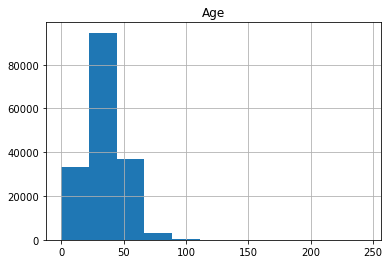

In [109]:
users.hist(bins=11)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

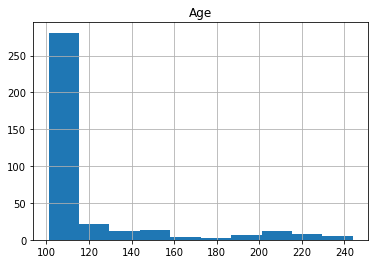

In [110]:
users[users['Age']>100].hist()

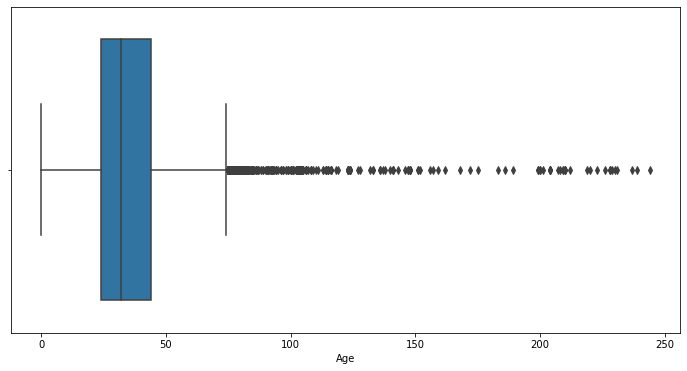

In [111]:
#most users with age greater than 100 are probably outliers

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
ax = sns.boxplot(x=users["Age"])

In [112]:
len(users[users['Age']>104])

108

In [113]:
users[users['Age']>104].head()

,User-ID,Location,Age,city,region,country
1578,1579,"akure, ondo/nigeria, nigeria",231.0,akure,ondo/nigeria,nigeria
3210,3211,"le mesnil saint denis, yvelines, france",119.0,le mesnil saint denis,yvelines,france
8329,8330,"newcastle, thenorth, united kingdom",114.0,newcastle,thenorth,united kingdom
8457,8458,"milano, lombardia, italy",230.0,milano,lombardia,italy
8781,8782,"calgary, alberta, canada",239.0,calgary,alberta,canada


In [114]:
df10 = users.copy()

In [115]:
# the first bin is '-1' so that users with Age equal to zero will be assigned to the '0-14' age group
bins= [-1,14,24,34, 44, 54, 64, 74, 84, 94, 104, 300]
labels = ['0-14','15-24','25-34','35-44','45-54','55-64','65-74','75-84', '85-94', '95-104', 'older than 104']
df10['AgeGroup'] = pd.cut(df10['Age'], bins=bins, labels=labels, right=True)
df10

,User-ID,Location,Age,city,region,country,AgeGroup
0,1,"nyc, new york, usa",NaN,nyc,new york,usa,NaN
1,2,"stockton, california, usa",18.0,stockton,california,usa,15-24
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia,NaN
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal,15-24
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom,NaN
...,...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,oregon,usa,NaN
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom,45-54
278855,278856,"brampton, ontario, canada",NaN,brampton,ontario,canada,NaN
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,tennessee,usa,NaN


In [116]:
# count nan values
print('count nan values:')
df10[['Age', 'AgeGroup']].isna().sum()

count nan values:


Age         110762
AgeGroup    110762
dtype: int64

In [117]:
df10[df10['Age'].notnull() & df10['AgeGroup'].isna()]

,User-ID,Location,Age,city,region,country,AgeGroup


In [118]:
df10.groupby(['AgeGroup'])['Age'].count()

AgeGroup
0-14               4313
15-24             40001
25-34             50767
35-44             32690
45-54             23152
55-64             12493
65-74              3596
75-84               615
85-94                83
95-104              278
older than 104      108
Name: Age, dtype: int64

In [119]:
df10[df10['Age']==0].head(1)

,User-ID,Location,Age,city,region,country,AgeGroup
219,220,"bogota, bogota, colombia",0.0,bogota,bogota,colombia,0-14


In [120]:
df10[df10['Age']==14].head(1)

,User-ID,Location,Age,city,region,country,AgeGroup
10,11,"melbourne, victoria, australia",14.0,melbourne,victoria,australia,0-14


In [121]:
df10[df10['Age']>104].head(1)

,User-ID,Location,Age,city,region,country,AgeGroup
1578,1579,"akure, ondo/nigeria, nigeria",231.0,akure,ondo/nigeria,nigeria,older than 104


In [122]:
age_groups = list(df10.AgeGroup.unique())
age_groups

[nan,
 '15-24',
 '55-64',
 '25-34',
 '0-14',
 '45-54',
 '35-44',
 '65-74',
 '75-84',
 '95-104',
 'older than 104',
 '85-94']

In [123]:
print('number of bins: ', len(bins))
print('number of labels: ', len(labels))
print('number of age_groups: ', len(age_groups))

number of bins:  12
number of labels:  11
number of age_groups:  12


In [124]:
dict10 = {}

for i in labels:
        dict10[i] = df10[df10['AgeGroup']==i]

dict10['nan'] = df10[df10['AgeGroup'].isna()]

print(dict10.keys())

dict_keys(['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94', '95-104', 'older than 104', 'nan'])


In [125]:
user_groups = pd.DataFrame(dict10.keys(), columns=['AgeGroup'])
number_of_users = []

for i in dict10.keys():
    number_of_users_in_age_group = len(dict10[i])
    number_of_users.append(number_of_users_in_age_group)
    print('number of users in Age Group {} : '.format(i), number_of_users_in_age_group)
    print(dict10[i][['User-ID', 
                     'city',	
                     'region',	
                     'country',   
                     'Age', 
                     'AgeGroup']].head())
    print('')
    

user_groups['number_of_users'] = number_of_users
print('')
print('total number of users: ') 
print(user_groups)
print('')
print('final check: ', user_groups.number_of_users.sum() == len(users))

number of users in Age Group 0-14 :  4313
    User-ID               city       region    country   Age AgeGroup
10       11          melbourne     victoria  australia  14.0     0-14
18       19             weston                          14.0     0-14
40       41             santee   california        usa  14.0     0-14
119     120  villeneuve d`ascq         nord     france  13.0     0-14
219     220             bogota       bogota   colombia   0.0     0-14

number of users in Age Group 15-24 :  40001
   User-ID       city               region   country   Age AgeGroup
1        2   stockton           california       usa  18.0    15-24
3        4      porto             v.n.gaia  portugal  17.0    15-24
19      20  langhorne         pennsylvania       usa  19.0    15-24
23      24    cologne                  nrw   germany  19.0    15-24
27      28   freiburg   baden-wuerttemberg   germany  24.0    15-24

number of users in Age Group 25-34 :  50767
   User-ID            city           reg

### 11. Find the books that appear only in the goodbooks datasets.

In [126]:
books.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Mean-Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0


In [127]:
goodbooks.head(1)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9780439023480.0,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...


In [128]:
df11 = pd.merge(goodbooks,
                books,
                how='left',
                left_on='isbn',
                right_on='ISBN')



In [129]:
# books that appear only in the goodbooks datasets ('ISBN' from Books Dataframe is null)
df11[df11['ISBN'].isna()][['book_id',
                           'goodreads_book_id',
                           'best_book_id',
                           'work_id',
                           'isbn', 
                           'ISBN', 
                           'authors', 
                           'original_publication_year', 
                           'title']]

,book_id,goodreads_book_id,best_book_id,work_id,isbn,ISBN,authors,original_publication_year,title
0,1,2767052,2767052,2792775,439023483,NaN,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)"
1,2,3,3,4640799,439554934,NaN,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...
2,3,41865,41865,3212258,316015849,NaN,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)"
3,4,2657,2657,3275794,61120081,NaN,Harper Lee,1960.0,To Kill a Mockingbird
4,5,4671,4671,245494,743273567,NaN,F. Scott Fitzgerald,1925.0,The Great Gatsby
...,...,...,...,...,...,...,...,...,...
94,95,5297,5297,1858012,375751513,NaN,"Oscar Wilde, Jeffrey Eugenides",1891.0,The Picture of Dorian Gray
95,96,13536860,13536860,18034963,345803507,NaN,E.L. James,2012.0,"Fifty Shades Freed (Fifty Shades, #3)"
96,97,17245,17245,3165724,393970124,NaN,"Bram Stoker, Nina Auerbach, David J. Skal",1897.0,Dracula
97,98,5060378,5060378,6976108,307269981,NaN,"Stieg Larsson, Reg Keeland",2006.0,"The Girl Who Played with Fire (Millennium, #2)"


### 12. Assuming that each pair (author, title) identifies a book, for each book find the number of times it appears in the books dataset. Which books appear the most times?

In [130]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Mean-Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,4.928571


In [131]:
df12 = books.groupby(['Book-Author','Book-Title'])['ISBN'].count().reset_index()
df12 = df12.rename(columns = {'ISBN':'book_count'})
df12

,Book-Author,Book-Title,book_count
0,D. Chiel,Die Hard: With a Vengeance - A Novel,1
1,J. D. Landis,The Taking,1
2,Mimma Balia,Ruskin's Rose: A Venetian Love Story,1
3,'N Sync,Nsync : The Official Book,1
4,142 moms from all over the world,The Mom-to-Mom Guide to the Baby Years: Review...,1
...,...,...,...
251178,Ã?dÃÂ¶n von HorvÃÂ¡th,Geschichten aus dem Wiener Wald (Gesammelte We...,1
251179,Ã?dÃÂ¶n von HorvÃÂ¡th,"SportmÃÂ¤rchen, andere Prosa und Verse (Gesam...",1
251180,Ã?Ã?dÃ?ÃÂ¶n von Horvath,"Suhrkamp BasisBibliothek (SBB), Nr.7, Jugend o...",1
251181,Ã?Ã?pictÃ?ÃÂ¨te,Maximes et pensÃ?ÃÂ©es : Ã?Ã?pictÃ?ÃÂ¨te,1


In [132]:
# Author and book with highest "book_count" value
df12.iloc[df12['book_count'].idxmax(),:]

Book-Author    Louisa May Alcott
Book-Title          Little Women
book_count                    21
Name: 150649, dtype: object

### 13. Find the author with the highest average rating according to the goodbooks datasets.

In [133]:
authors2.head()

,isbn,Author,number_of_authors,work_text_reviews_count,shared number of reviews with a text
119,61122416,Alan R. Clarke,2,55781,27890.500000
108,553296981,B.M. Mooyaart-Doubleday,3,20825,6941.666667
34,143039954,Bernard Knox,5,8101,1620.200000
97,451524934,CelÃ¢l Ãster,3,45518,15172.666667
76,393970124,David J. Skal,3,17263,5754.333333


In [134]:
goodbooks.head(2)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9780439023480.0,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9780439554930.0,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...


In [135]:
df13 = pd.merge(goodbooks,
                authors2[['isbn',
                          'Author']],
                on='isbn',
                how='inner')

In [136]:
df13[['isbn', 
      'Author',
      'average_rating']].head()

,isbn,Author,average_rating
0,439023483,Suzanne Collins,4.34
1,439554934,Mary GrandPrÃ©,4.44
2,439554934,J.K. Rowling,4.44
3,316015849,Stephenie Meyer,3.57
4,61120081,Harper Lee,4.25


In [137]:
df13_grouped = df13.groupby(['Author'])['average_rating'].mean().reset_index()
df13_grouped = df13_grouped.rename(columns = {'average_rating':'author_mean_rating'})
df13_grouped

,Author,author_mean_rating
0,Alan R. Clarke,3.820
1,B.M. Mooyaart-Doubleday,4.100
2,Bernard Knox,3.730
3,CelÃ¢l Ãster,4.140
4,David J. Skal,3.980
...,...,...
105,Veronica Roth,4.155
106,William Golding,3.640
107,William Goldman,4.250
108,William Shakespeare,3.730


In [138]:
# author with the highest average rating
df13_grouped.iloc[df13_grouped.author_mean_rating.idxmax(),:]

Author                 Rufus Beck
author_mean_rating           4.53
Name: 32, dtype: object